In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X=[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T=[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


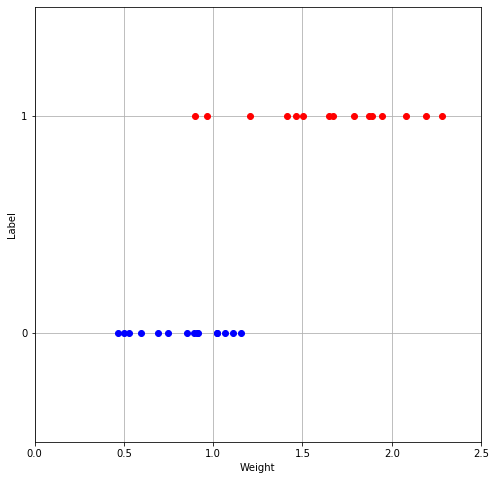

In [82]:
## 곤충 N마리의 성별, 무게 가상데이터를 만든다. 

np.random.seed(seed=0)
X_min =0
X_max = 2.5
X_n = 30
X_col = ['cornflowerblue', 'gray']
X = np.zeros(X_n)
T = np.zeros(X_n,dtype=np.uint8)
Dist_s = [0.4, 0.8]   # 성별에 따른 무게 오프셋
Dist_w = [0.8, 1.6]   # 성별에 따른 무게의 범위
Pi = 0.5
for n in range(X_n):
    wk = np.random.rand()
    #T[n] = 0 * (wk<Pi) + 1 * (wk>=Pi)
    T[n] = wk>=Pi
    X[n] = np.random.rand() * Dist_w[T[n]] + Dist_s[T[n]]
    
print('X=' + str(np.round(X,2)))
print('T=' + str(T))

def show_data1(x,t):
    K = np.max(t) + 1
    for k in range(K):
        if k==0 :
            plt.plot(x[t==0], t[t==0],'bo')
        else :
            plt.plot(x[t==1], t[t==1], 'ro')
        
        plt.grid(True)
        plt.ylim(-0.5,1.5)
        plt.xlim(X_min,X_max)
        plt.yticks([0,1])
    plt.xlabel('Weight')
    plt.ylabel('Label')
    
flg = plt.figure(figsize=(8,8))
show_data1(X,T)
plt.show()

In [ ]:
# P(t=1|x)


w=0.25


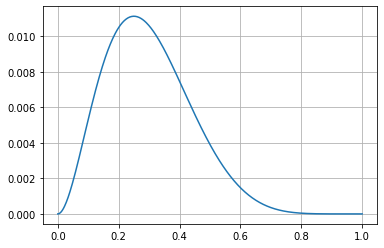

In [151]:
## 최대 가능도법 (Maximum Likelyhood Method)
# 주어진 입력 데이터 x에 대해 결과 데이터 t가 생성될 확률(Likelyhood)이 가장 커지는 w를 구한다. 
def binary_likelyhood_method(t,w):   # 1이 나올 확률이 w일 때 데이터셋 t가 나올 수 있는 확률
    pt = 1
    for i in range(len(t)):
        p = t[i]*w + (1-t[i])*(1-w)    # 데이터 t[i]가 나올 확률 
        pt = pt * p                    # 데이터셋 t가 나올 확률
    return pt*pt

w_n = 500
T_test = [0,0,0,1]               # test data set
w_test = np.linspace(0,1,w_n)

P=binary_likelyhood_method(T_test,w_test)

plt.plot(w_test,P)
plt.grid(True)
maxW = (np.where(P==max(P))[0]/w_n)[0]
print('w={0:.2f}'.format(maxW))

1.25

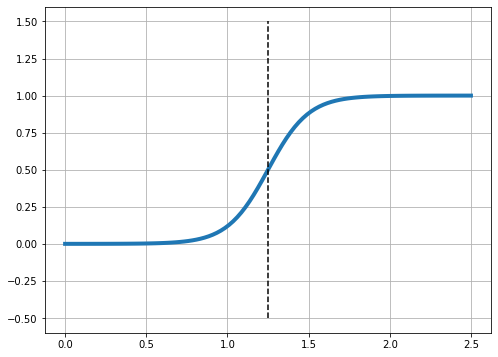

In [153]:
## 로지스틱 회귀 모델
def logistic_func(x,w):
    #y = sigmoid_func((w[0]*x + w[1]))
    y = 1/(1+np.exp(-(w[0] * x + w[1])))
    return y

def show_logistic(w):
    xb = np.linspace(X_min,X_max,100)
    y = logistic_func(xb,w)
    plt.plot(xb,y,'-',linewidth=4)
    
    i = np.min(np.where(y>0.5))
    B = (xb[i-1] + xb[i])/2
    
    plt.plot([B,B],[-0.5,1.5],'k--')
    plt.grid(True)
    return B

W = [8,-10]
plt.figure(figsize=(8,6))
show_logistic(W)


In [56]:
# P(t=1|x) = sigma(w0x+w1)


In [156]:
# 평균 교차 엔트로피 오차 --------------
def cee_logistic(w, x, t):
    y = logistic_func(x,w)
    cee =0
    for n in range(len(y)):
        cee = cee - (t[n]*np.log(y[n]) + (1-t[n])*np.log(1-y[n]))
    cee = cee / X_n   # 정규화 
    return cee

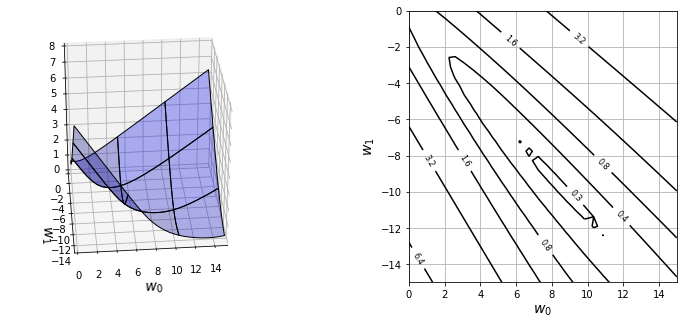

In [157]:
from mpl_toolkits.mplot3d import Axes3D

xn = 30

w_range = np.array([[0,15],[-15,0]])
x0 = np.linspace(w_range[0,0],w_range[0,1],xn)
x1 = np.linspace(w_range[1,0],w_range[1,1],xn)
xx0, xx1 = np.meshgrid(x0,x1)
C = np.zeros((len(x1),len(x0)))
w = np.zeros(2)
for i0 in range(xn):
    for i1 in range(xn):
        w[0] = x0[i0]
        w[1] = x1[i1]
        C[i1,i0] = cee_logistic(w,X,T)
        
# display 
plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace=0.5)
ax =plt.subplot(1,2,1,projection='3d')
ax.plot_surface(xx0,xx1,C,color='blue',edgecolor='black',
               rstride=10, cstride=10,alpha=0.3)
ax.set_xlabel('$w_0$',fontsize=14)
ax.set_ylabel('$w_1$',fontsize=14)
ax.set_xlim(0,15)
ax.set_ylim(-15,0)
ax.set_zlim(0,8)
ax.view_init(30,-95)

plt.subplot(1,2,2)
cont = plt.contour(xx0,xx1,C,20,colors='black', levels=[0.26,0.4,0.8,1.6,3.2,6.4])
cont.clabel(fmt='%1.1f', fontsize=8)
plt.xlabel('$w_0$',fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.grid(True)
plt.show()



array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0], dtype=uint8)

In [158]:
## 경사 하강법
def dcee_logistic(w,x,t):
    y = logistic_func(x,w)
    dcee = np.zeros(2)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n]-t[n])*x[n]
        dcee[1] = dcee[1] + (y[n] - t[n])
    dcee = dcee/X_n
    return dcee

w0=8.18, w1=-9.38
CEE=0.25
Boundary=1.15


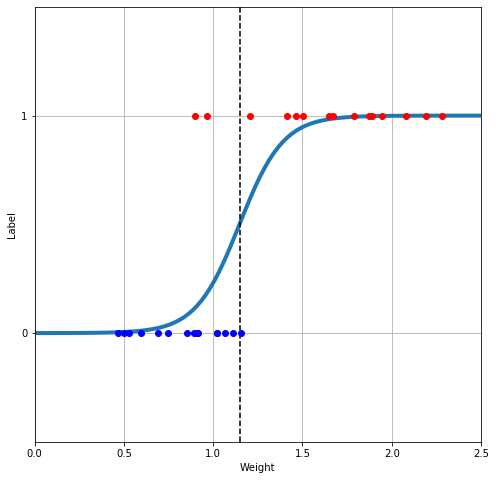

In [159]:
from scipy.optimize import minimize

def fit_logistic(w_init,x,t):
    res1 = minimize(cee_logistic,w_init,args=(x,t),
                   jac = dcee_logistic,method="CG")
    return res1.x

plt.figure(figsize=(8,8))
W_init = [1,-1]
W = fit_logistic(W_init,X,T)
print('w0={0:.2f}, w1={1:.2f}'.format(W[0],W[1]))
B = show_logistic(W)
show_data1(X,T)
plt.ylim(-0.5,1.5)
plt.xlim(X_min,X_max)
cee = cee_logistic(W,X,T)
print("CEE={0:.2f}".format(cee))
print("Boundary={0:.2f}".format(B))
plt.show()